In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
death = pd.read_csv('tidytuesday/data/2018/2018-11-13/malaria_deaths.csv')
death_age = pd.read_csv('tidytuesday/data/2018/2018-11-13/malaria_deaths_age.csv')
inc = pd.read_csv('tidytuesday/data/2018/2018-11-13/malaria_inc.csv')

In [3]:
# tidy death_age
## remove duplicate index column
death_age = death_age.drop(labels = 'Unnamed: 0', axis = 1)
## rename entity to Entity
death_age.columns = ['Entity' if x=='entity' else x for x in death_age.columns]

In [4]:
## generate an indicator order to sort df
death_age['age'] = death_age['age_group'].replace({'Under 5': 0, '5-14': 1, '15-49': 2, '50-69': 3, '70 or older': 4})

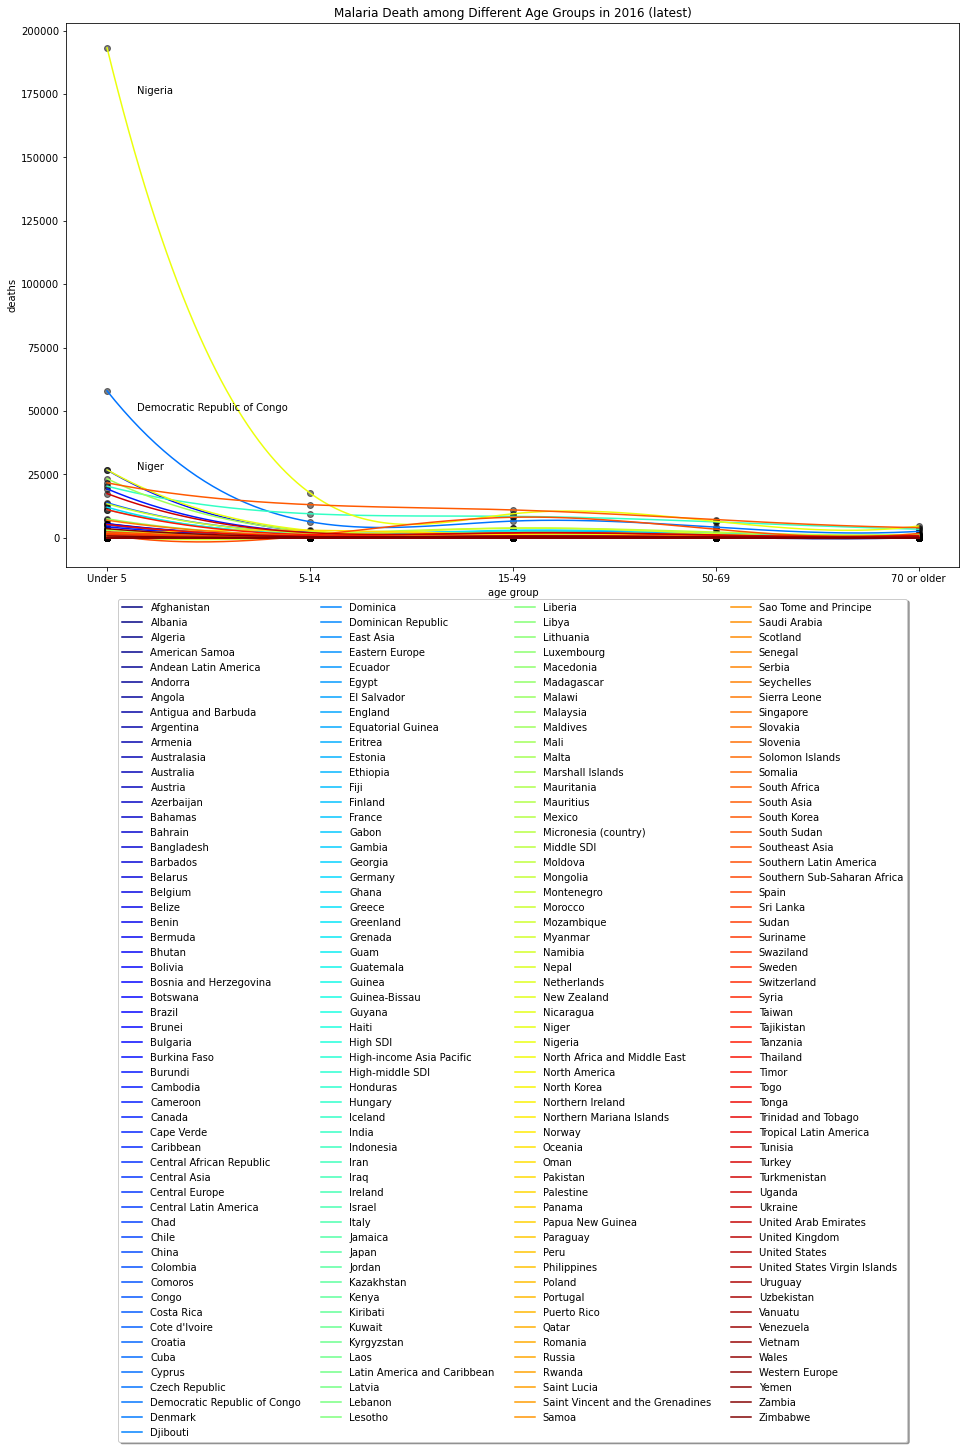

In [5]:
## remove entities that are not country
countries = list(np.unique(death_age['Entity']))
countries.remove('World')
countries.remove('Sub-Saharan Africa')
countries.remove('Western Sub-Saharan Africa')
countries.remove('Low SDI')
countries.remove('Low-middle SDI')
countries.remove('Eastern Sub-Saharan Africa')
countries.remove('Central Sub-Saharan Africa')

colors = plt.cm.jet(np.linspace(0, 1, len(countries)))
plt.figure(figsize=(16,10))

for i, country in enumerate(countries):
    df = death_age[death_age['Entity'] == country]
    df = df[df['year'] == 2016]
    df = df.sort_values(['age']).reset_index(drop=True)
    x = df['age']
    y = df['deaths']
    x_new = np.linspace(x.min(), x.max(), 300)
    y_smooth = make_interp_spline(x, y)(x_new)
    plt.scatter(x, y, c='black',alpha = 0.5)
    ## smooth line
    plt.plot(x_new, y_smooth,c=colors[i], label=country)
    plt.xticks(np.arange(min(x), max(x)+1, 1.0), ['Under 5', '5-14', '15-49', '50-69', '70 or older'])

plt.text(0.15, 175000, 'Nigeria')
plt.text(0.15, 50000, 'Democratic Republic of Congo')
plt.text(0.15, 27000, 'Niger')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.xlabel('age group')
plt.ylabel('deaths')
plt.title('Malaria Death among Different Age Groups in 2016 (latest)')
plt.show()